In [34]:
pip install selenium


Note: you may need to restart the kernel to use updated packages.


In [35]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd

# Define the path to the ChromeDriver executable
chrome_driver_path = r"C:\Users\wendy\Downloads\chromedriver\chromedriver\chromedriver.exe"

# Set Chrome options
chrome_options = Options()
#chrome_options.add_argument("--headless")  # Run in headless mode
#chrome_options.add_argument("--disable-gpu")  # Disable GPU acceleration
#chrome_options.add_argument("--no-sandbox")  # Bypass OS security model

# Create a Service object
service = Service(chrome_driver_path)

# Initialize the WebDriver using the Service object and options
driver = webdriver.Chrome(service=service, options=chrome_options)

# URL to scrape
url = 'http://aklc.hydrotel.co.nz:8080/KiWIS/KiWIS?service=kisters&type=queryServices&request=getTimeseriesValues&datasource=1&format=html&ts_id=2860&from=2006-01-01'  # Replace with the actual URL
driver.get(url)

# Find all rows with class "even" and "odd"
rows = driver.find_elements(By.XPATH, '//tr[@class="even" or @class="odd"]')

# Extract data
data_tuples = []
for row in rows:
  cells = row.find_elements(By.TAG_NAME, 'td')
  timestamp = cells[0].text
  value = cells[1].text
  data_tuples.append((timestamp, value))

# Create DataFrame
df = pd.DataFrame(data_tuples, columns=['Timestamp', 'Value'])

# Close the WebDriver
driver.quit()

# Display the DataFrame
print(df)
df.to_csv(r'C:\Users\wendy\anaconda3\CapstoneProject\NO2_07112024.csv', index = False)

                            Timestamp Value
0       2006-01-01T00:00:00.000+12:00   1.2
1       2006-01-01T01:00:00.000+12:00   0.8
2       2006-01-01T02:00:00.000+12:00   0.5
3       2006-01-01T03:00:00.000+12:00   0.4
4       2006-01-01T04:00:00.000+12:00   0.4
...                               ...   ...
153908  2024-11-06T20:00:00.000+12:00   8.9
153909  2024-11-06T21:00:00.000+12:00   9.2
153910  2024-11-06T22:00:00.000+12:00   9.6
153911  2024-11-06T23:00:00.000+12:00   9.2
153912  2024-11-07T00:00:00.000+12:00   7.6

[153913 rows x 2 columns]


In [36]:
df

,Timestamp,Value
0,2006-01-01T00:00:00.000+12:00,1.2
1,2006-01-01T01:00:00.000+12:00,0.8
2,2006-01-01T02:00:00.000+12:00,0.5
3,2006-01-01T03:00:00.000+12:00,0.4
4,2006-01-01T04:00:00.000+12:00,0.4
...,...,...
153908,2024-11-06T20:00:00.000+12:00,8.9
153909,2024-11-06T21:00:00.000+12:00,9.2
153910,2024-11-06T22:00:00.000+12:00,9.6
153911,2024-11-06T23:00:00.000+12:00,9.2


In [38]:
df.tail(100)

,Timestamp,Value
153813,2024-11-02T21:00:00.000+12:00,1.9
153814,2024-11-02T22:00:00.000+12:00,1.3
153815,2024-11-02T23:00:00.000+12:00,0.9
153816,2024-11-03T00:00:00.000+12:00,0.7
153817,2024-11-03T01:00:00.000+12:00,0.9
...,...,...
153908,2024-11-06T20:00:00.000+12:00,8.9
153909,2024-11-06T21:00:00.000+12:00,9.2
153910,2024-11-06T22:00:00.000+12:00,9.6
153911,2024-11-06T23:00:00.000+12:00,9.2


In [39]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('NO2_07112024.csv')

# Display the first few rows
print(data.head())
print (data.tail())

                       Timestamp  Value
0  2006-01-01T00:00:00.000+12:00    1.2
1  2006-01-01T01:00:00.000+12:00    0.8
2  2006-01-01T02:00:00.000+12:00    0.5
3  2006-01-01T03:00:00.000+12:00    0.4
4  2006-01-01T04:00:00.000+12:00    0.4
                            Timestamp  Value
153908  2024-11-06T20:00:00.000+12:00    8.9
153909  2024-11-06T21:00:00.000+12:00    9.2
153910  2024-11-06T22:00:00.000+12:00    9.6
153911  2024-11-06T23:00:00.000+12:00    9.2
153912  2024-11-07T00:00:00.000+12:00    7.6


In [40]:
# Display the summary information of the dataset, including data types and non-null counts
print("\nSummary information of the dataset:")
df.info()

# Display basic statistical details like mean, median, standard deviation, etc., for numeric columns
print("\nBasic statistical details for numeric columns:")
df.describe()

# Display data types
print(df.dtypes)
print(df.shape)


Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153913 entries, 0 to 153912
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Timestamp  153913 non-null  object
 1   Value      153913 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB

Basic statistical details for numeric columns:
Timestamp    object
Value        object
dtype: object
(153913, 2)


In [41]:
# Convert 'Value' to numeric, forcing errors to NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [42]:
# Display data types
print(df.dtypes)
print(df.shape)

Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
dtype: object
(153913, 2)


In [43]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Timestamp       0
Value        6124
dtype: int64


In [44]:
# Fill missing values
#df['Value'] = df['Value'].fillna(method='ffill')
df['Value'] = df['Value'].fillna(df['Value'].mean())

In [45]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Timestamp    0
Value        0
dtype: int64


In [46]:
# Check the number of duplicate rows
print("Number of duplicate rows before removing duplicates:", df.duplicated().sum())

Number of duplicate rows before removing duplicates: 0


In [49]:
# Feature Engineering
# Extract date and time components
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Date'] = df['Timestamp'].dt.date
# Convert 'Timestamp' to datetime
#df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = pd.to_datetime(df['Date'])

# Display the transformed DataFrame
print(df.head())

                  Timestamp  Value  Year  Month  Day  Hour       Date
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01


In [50]:
# Display data types
print(df.dtypes)
print(df.shape)

Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
Year                             int32
Month                            int32
Day                              int32
Hour                             int32
Date                    datetime64[ns]
dtype: object
(153913, 7)


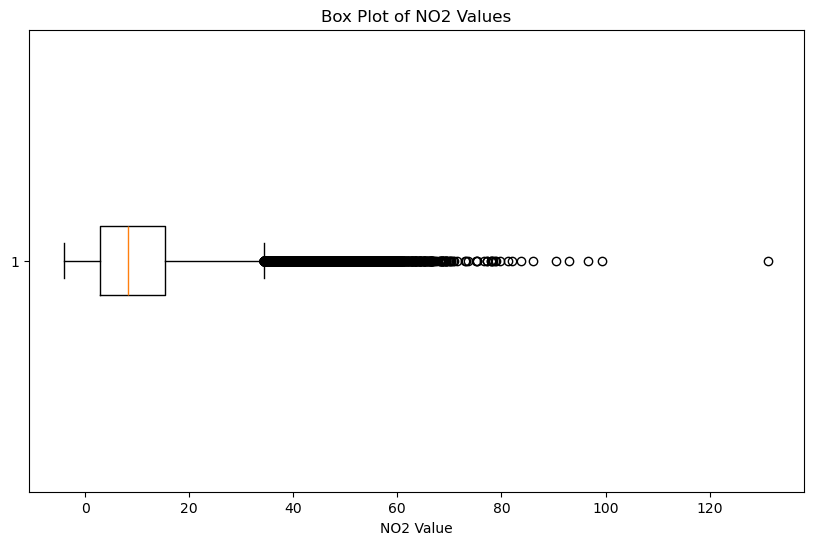

In [51]:
# Checking and Handling Outliners 

# Method 1: Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Value'], vert=False)
plt.title('Box Plot of NO2 Values')
plt.xlabel('NO2 Value')
plt.show()


In [59]:
from scipy import stats
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

In [54]:

# Method 2: Z-Score
df['Z-Score'] = zscore(df['Value'])
outliers_z = df[np.abs(df['Z-Score']) > 3]
print("Outliers detected using Z-Score method:")
print(outliers_z)


Outliers detected using Z-Score method:
                       Timestamp  Value  Year  Month  Day  Hour       Date  \
952    2006-02-09 16:00:00+12:00   45.3  2006      2    9    16 2006-02-09   
1736   2006-03-14 08:00:00+12:00   48.5  2006      3   14     8 2006-03-14   
1839   2006-03-18 15:00:00+12:00   45.4  2006      3   18    15 2006-03-18   
1882   2006-03-20 10:00:00+12:00   43.1  2006      3   20    10 2006-03-20   
1888   2006-03-20 16:00:00+12:00   45.9  2006      3   20    16 2006-03-20   
...                          ...    ...   ...    ...  ...   ...        ...   
152263 2024-08-30 07:00:00+12:00   52.6  2024      8   30     7 2024-08-30   
152264 2024-08-30 08:00:00+12:00   65.1  2024      8   30     8 2024-08-30   
152265 2024-08-30 09:00:00+12:00   46.9  2024      8   30     9 2024-08-30   
152503 2024-09-09 07:00:00+12:00   57.0  2024      9    9     7 2024-09-09   
152504 2024-09-09 08:00:00+12:00   59.1  2024      9    9     8 2024-09-09   

         Z-Score  
952 

In [64]:
# Define a threshold for outlier detection (e.g., z-score > 3)
z_threshold = 3

# Calculate z-scores for each numerical column
z_scores = stats.zscore(df.select_dtypes(include=['number']))

# Identify outliers by z-score
outliers = (abs(z_scores) > z_threshold).any(axis=1)

print("Outliers detected using z-score method:")
print(outliers)


Outliers detected using z-score method:
0         False
1         False
2         False
3         False
4         False
          ...  
153908    False
153909    False
153910    False
153911    False
153912    False
Length: 153913, dtype: bool


In [65]:
# Remove outliers from the DataFrame
df_no_outliers = df[~outliers]

# Check the shape of the DataFrame after removing outliers
print("Shape after removing outliers:", df_no_outliers.shape)


Shape after removing outliers: (151364, 8)


In [66]:
df1 = df_no_outliers.copy()
df1.shape


(151364, 8)

In [71]:
# Drop the 'Z-Score' column
df_cleaned = df1.drop(columns=['Z-Score'])
print(df_cleaned.head())


                  Timestamp  Value  Year  Month  Day  Hour       Date
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01


In [72]:
df_cleaned.shape


(151364, 7)

In [73]:
# Save the cleaned data into new csv file so it's easy to recall later on 
df_cleaned.to_csv(r'C:\Users\wendy\anaconda3\CapstoneProject\NO2_07112024_NoOutliers.csv', index=False)


In [75]:
print(df.head())

                  Timestamp  Value  Year  Month  Day  Hour       Date  \
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01   
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01   
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01   
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01   
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01   

    Z-Score  
0 -0.930644  
1 -0.968766  
2 -0.997357  
3 -1.006888  
4 -1.006888  


In [78]:
print(df.shape)

(153913, 8)


In [79]:
# Drop the 'Z-Score' column
df_WithOutliers = df.drop(columns=['Z-Score'])
print(df_WithOutliers.head())

                  Timestamp  Value  Year  Month  Day  Hour       Date
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01


In [80]:
print(df_WithOutliers.shape)

(153913, 7)


In [81]:
# Save the the data with outliers into new csv file so it's easy to recall later on 
df_WithOutliers.to_csv(r'C:\Users\wendy\anaconda3\CapstoneProject\NO2_07112024_WithOutliers.csv', index=False)

In [74]:
# Load the CSV file
data_cleaned = pd.read_csv('NO2_07112024_NoOutliers.csv')

# Display the first few rows
print(data_cleaned.head())
print (data_cleaned.tail())

                   Timestamp  Value  Year  Month  Day  Hour        Date
0  2006-01-01 00:00:00+12:00    1.2  2006      1    1     0  2006-01-01
1  2006-01-01 01:00:00+12:00    0.8  2006      1    1     1  2006-01-01
2  2006-01-01 02:00:00+12:00    0.5  2006      1    1     2  2006-01-01
3  2006-01-01 03:00:00+12:00    0.4  2006      1    1     3  2006-01-01
4  2006-01-01 04:00:00+12:00    0.4  2006      1    1     4  2006-01-01
                        Timestamp  Value  Year  Month  Day  Hour        Date
151359  2024-11-06 20:00:00+12:00    8.9  2024     11    6    20  2024-11-06
151360  2024-11-06 21:00:00+12:00    9.2  2024     11    6    21  2024-11-06
151361  2024-11-06 22:00:00+12:00    9.6  2024     11    6    22  2024-11-06
151362  2024-11-06 23:00:00+12:00    9.2  2024     11    6    23  2024-11-06
151363  2024-11-07 00:00:00+12:00    7.6  2024     11    7     0  2024-11-07


In [82]:
# Load the CSV file
data = pd.read_csv('NO2_07112024_WithOutliers.csv')

# Display the first few rows
print(data.head())
print (data.tail())

                   Timestamp  Value  Year  Month  Day  Hour        Date
0  2006-01-01 00:00:00+12:00    1.2  2006      1    1     0  2006-01-01
1  2006-01-01 01:00:00+12:00    0.8  2006      1    1     1  2006-01-01
2  2006-01-01 02:00:00+12:00    0.5  2006      1    1     2  2006-01-01
3  2006-01-01 03:00:00+12:00    0.4  2006      1    1     3  2006-01-01
4  2006-01-01 04:00:00+12:00    0.4  2006      1    1     4  2006-01-01
                        Timestamp  Value  Year  Month  Day  Hour        Date
153908  2024-11-06 20:00:00+12:00    8.9  2024     11    6    20  2024-11-06
153909  2024-11-06 21:00:00+12:00    9.2  2024     11    6    21  2024-11-06
153910  2024-11-06 22:00:00+12:00    9.6  2024     11    6    22  2024-11-06
153911  2024-11-06 23:00:00+12:00    9.2  2024     11    6    23  2024-11-06
153912  2024-11-07 00:00:00+12:00    7.6  2024     11    7     0  2024-11-07


In [83]:
# Display the summary information of the dataset, including data types and non-null counts
print("\nSummary information of the dataset:")
data_cleaned.info()

# Display basic statistical details like mean, median, standard deviation, etc., for numeric columns
print("\nBasic statistical details for numeric columns:")
data_cleaned.describe()

# Display data types and shapes
print(data_cleaned.dtypes)
print(data_cleaned.shape)


Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151364 entries, 0 to 151363
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  151364 non-null  object 
 1   Value      151364 non-null  float64
 2   Year       151364 non-null  int64  
 3   Month      151364 non-null  int64  
 4   Day        151364 non-null  int64  
 5   Hour       151364 non-null  int64  
 6   Date       151364 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 8.1+ MB

Basic statistical details for numeric columns:
Timestamp     object
Value        float64
Year           int64
Month          int64
Day            int64
Hour           int64
Date          object
dtype: object
(151364, 7)


In [84]:
# Convert 'Timestamp' to datetime
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

In [85]:
# Display data types and shapes
print(data_cleaned.dtypes)
print(data_cleaned.shape)

Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
Year                             int64
Month                            int64
Day                              int64
Hour                             int64
Date                    datetime64[ns]
dtype: object
(151364, 7)


C:\Users\wendy\anaconda3\708\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wendy\anaconda3\708\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


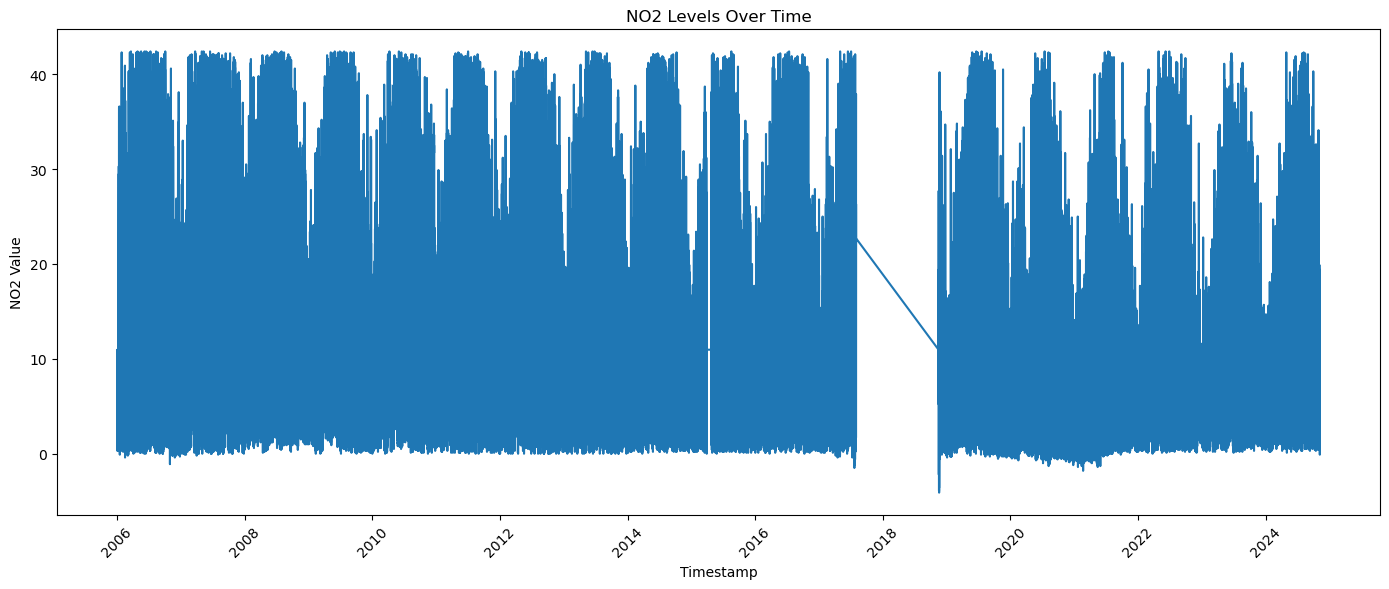

In [86]:
# Time Series Plot: Visualize the NO2 values over time
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data
plt.figure(figsize=(14, 6))
sns.lineplot(data=data_cleaned, x='Timestamp', y='Value')
plt.title('NO2 Levels Over Time')
plt.xlabel('Timestamp')
plt.ylabel('NO2 Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\wendy\anaconda3\708\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


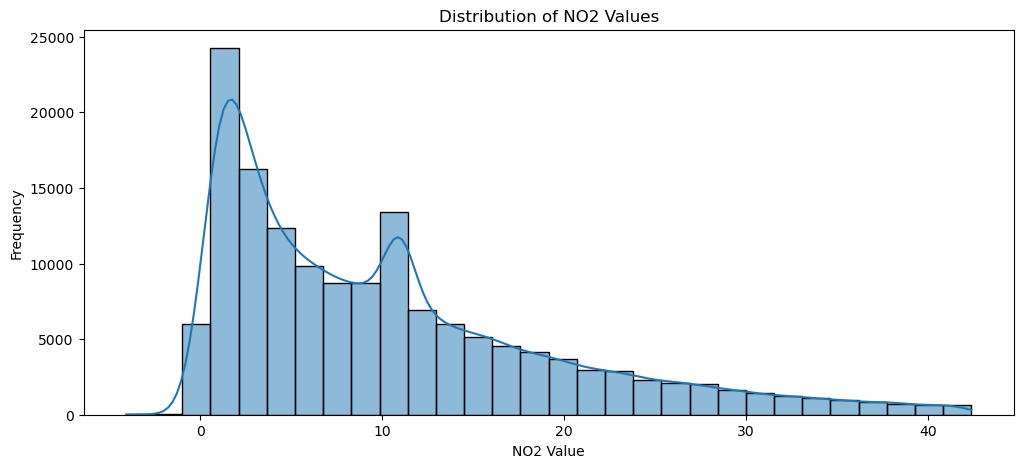

In [87]:
# Distribution Plot: Check the distribution of NO2 values
# Histogram of NO2 values
plt.figure(figsize=(12, 5))
sns.histplot(data_cleaned['Value'], bins=30, kde=True)
plt.title('Distribution of NO2 Values')
plt.xlabel('NO2 Value')
plt.ylabel('Frequency')
plt.show()

In [88]:
# Feature Enginering : Extract Weekday Information: Add a column to indicate whether the day is a weekday or weekend.
# We want to see the No2 values over the Weekdays vs Weekends patterns 

# Add a column for the day of the week
data_cleaned['DayOfWeek'] = data_cleaned['Timestamp'].dt.dayofweek

# Add a column to indicate if it's a weekend (Saturday=5, Sunday=6)
data_cleaned['IsWeekend'] = data_cleaned['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
# Display the transformed DataFrame
print(data_cleaned.head())

                  Timestamp  Value  Year  Month  Day  Hour       Date  \
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01   
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01   
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01   
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01   
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01   

   DayOfWeek  IsWeekend  
0          6          1  
1          6          1  
2          6          1  
3          6          1  
4          6          1  


C:\Users\wendy\AppData\Local\Temp\ipykernel_14448\3679259117.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_cleaned, x='Timestamp', y='Value', hue='IsWeekend', palette='coolwarm', ci=None)
C:\Users\wendy\anaconda3\708\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wendy\anaconda3\708\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


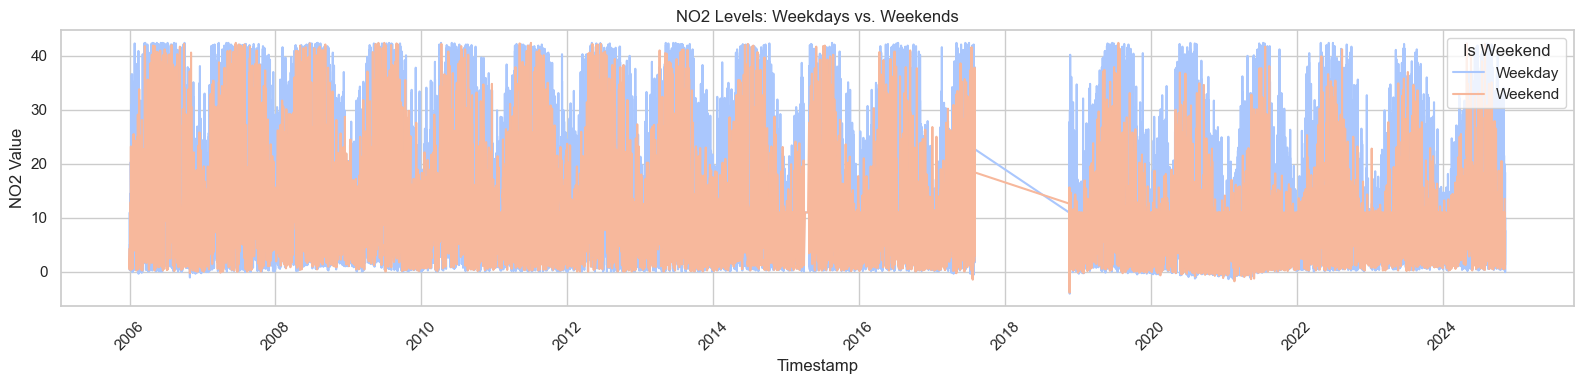

In [89]:
# Data Visualization : Plot NO2 Values for Weekdays vs. Weekends: Use line plots to compare the trends
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(16, 4))
sns.lineplot(data=data_cleaned, x='Timestamp', y='Value', hue='IsWeekend', palette='coolwarm', ci=None)
plt.title('NO2 Levels: Weekdays vs. Weekends')
plt.xlabel('Timestamp')
plt.ylabel('NO2 Value')
plt.xticks(rotation=45)
plt.legend(title='Is Weekend', labels=['Weekday', 'Weekend'])
plt.tight_layout()
plt.show()

In [90]:
# Summary Stats for Calculate Average NO2 Levels for Weekdays and Weekends:
# Display data types
print(data_cleaned.dtypes)

Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
Year                             int64
Month                            int64
Day                              int64
Hour                             int64
Date                    datetime64[ns]
DayOfWeek                        int32
IsWeekend                        int64
dtype: object


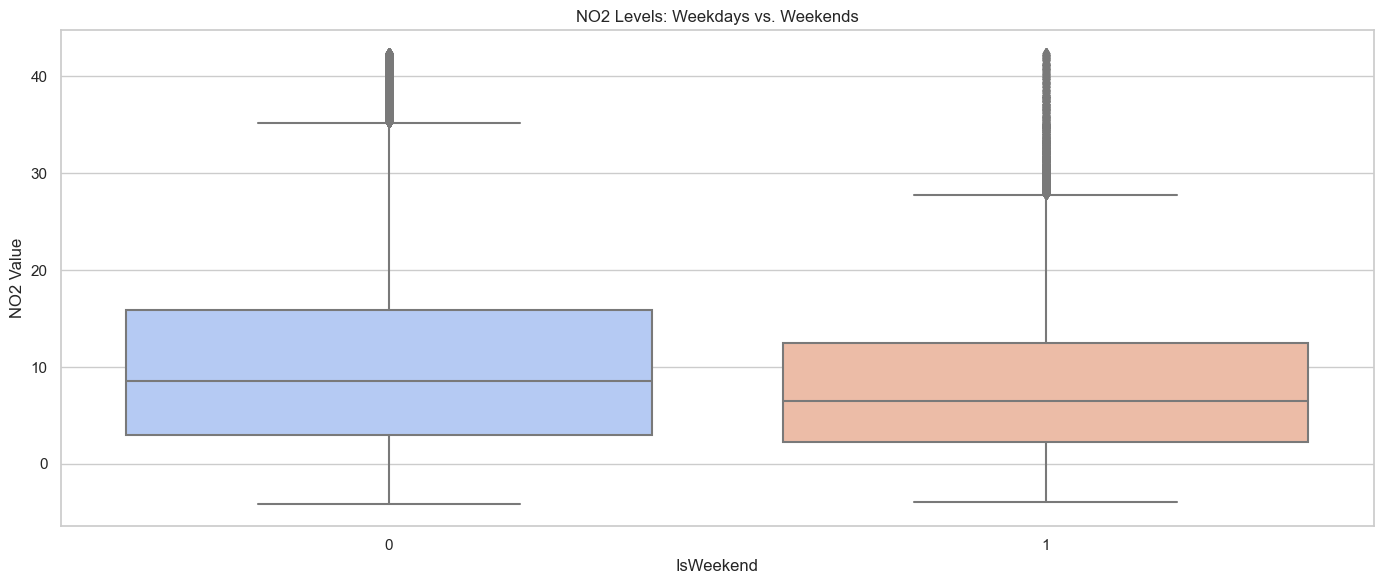

In [91]:
# Visualisation : Plot NO2 Levels for Weekdays vs. Weekends
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_cleaned, x='IsWeekend', y='Value', palette='coolwarm')
plt.title('NO2 Levels: Weekdays vs. Weekends')
plt.xlabel('IsWeekend')
plt.ylabel('NO2 Value')
plt.tight_layout()
plt.show()

In [92]:

# Calculate mean NO2 values for weekdays and weekends
mean_values = data_cleaned.groupby('IsWeekend')['Value'].mean()
print("Average NO2 Levels:")
print(f"Weekdays: {mean_values[0]:.2f}")
print(f"Weekends: {mean_values[1]:.2f}")

Average NO2 Levels:
Weekdays: 10.94
Weekends: 8.79


In [93]:
# Define Peak and Off-Peak Hours
# Assume peak hours are from 7 AM to 9 AM and 4 PM to 6 PM, and off-peak hours are the rest.
# Define peak and off-peak hours
def categorize_time(hour):
  if 7 <= hour <= 9 or 16 <= hour <= 18:
      return 'Peak'
  else:
      return 'Off-Peak'

# Apply the function to create a new column
data_cleaned['Period'] = data_cleaned['Timestamp'].dt.hour.apply(categorize_time)
# Display the transformed DataFrame
print(data_cleaned.head())
# Display data types
print(data_cleaned.dtypes)

                  Timestamp  Value  Year  Month  Day  Hour       Date  \
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01   
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01   
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01   
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01   
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01   

   DayOfWeek  IsWeekend    Period  
0          6          1  Off-Peak  
1          6          1  Off-Peak  
2          6          1  Off-Peak  
3          6          1  Off-Peak  
4          6          1  Off-Peak  
Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
Year                             int64
Month                            int64
Day                              int64
Hour                             int64
Date                    datetime64[ns]
DayOfWeek                        int32
IsWeekend                        

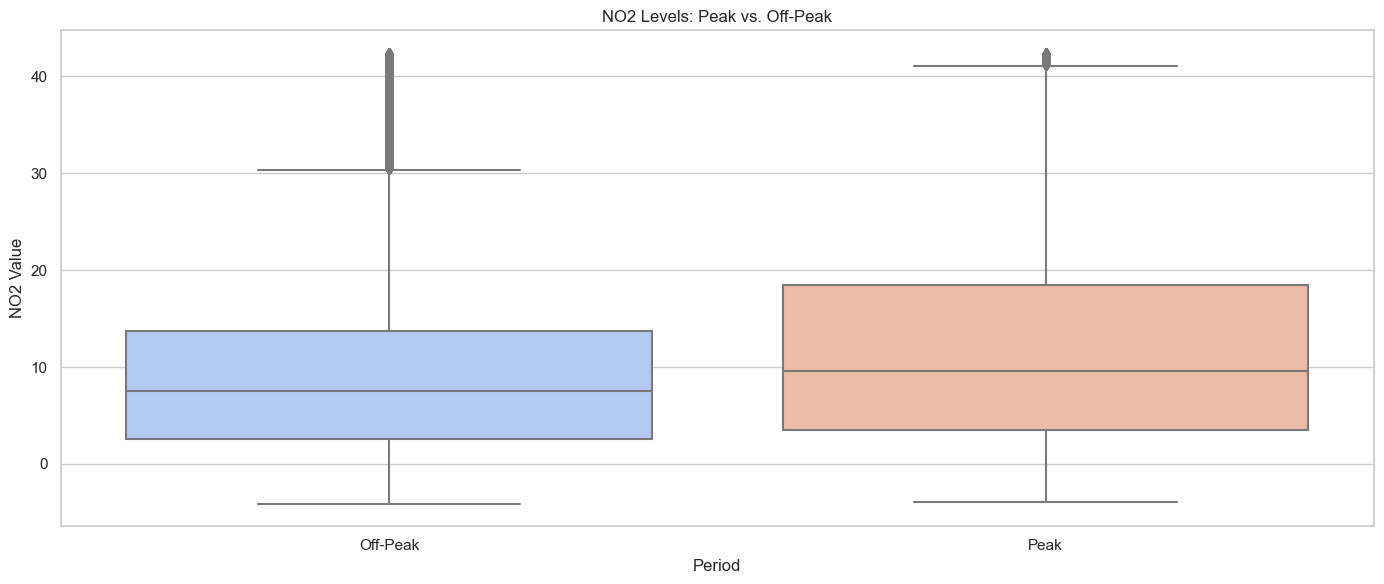

In [94]:
# Visualisation : Plot NO2 Levels for Peak vs. Off-Peak
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_cleaned, x='Period', y='Value', palette='coolwarm')
plt.title('NO2 Levels: Peak vs. Off-Peak')
plt.xlabel('Period')
plt.ylabel('NO2 Value')
plt.tight_layout()
plt.show()

In [95]:
# Calculate Average NO2 Levels for Peak and Off-Peak:
mean_values = data_cleaned.groupby('Period')['Value'].mean()
print("Average NO2 Levels:")
print(f"Peak: {mean_values['Peak']:.2f}")
print(f"Off-Peak: {mean_values['Off-Peak']:.2f}")

Average NO2 Levels:
Peak: 12.20
Off-Peak: 9.70


In [96]:
# Define Seasons : Assume winter months are June, July, and August, and summer months are December, January, and February.
# Define a function to categorize seasons
def categorize_season(month):
  if month in [6, 7, 8]:
      return 'Winter'
  elif month in [12, 1, 2]:
      return 'Summer'
  else:
      return 'Other'

# Apply the function to create a new column
data_cleaned['Season'] = data_cleaned['Timestamp'].dt.month.apply(categorize_season)
# Display the transformed DataFrame
print(data_cleaned.head())
# Display data types
print(data_cleaned.dtypes)

                  Timestamp  Value  Year  Month  Day  Hour       Date  \
0 2006-01-01 00:00:00+12:00    1.2  2006      1    1     0 2006-01-01   
1 2006-01-01 01:00:00+12:00    0.8  2006      1    1     1 2006-01-01   
2 2006-01-01 02:00:00+12:00    0.5  2006      1    1     2 2006-01-01   
3 2006-01-01 03:00:00+12:00    0.4  2006      1    1     3 2006-01-01   
4 2006-01-01 04:00:00+12:00    0.4  2006      1    1     4 2006-01-01   

   DayOfWeek  IsWeekend    Period  Season  
0          6          1  Off-Peak  Summer  
1          6          1  Off-Peak  Summer  
2          6          1  Off-Peak  Summer  
3          6          1  Off-Peak  Summer  
4          6          1  Off-Peak  Summer  
Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
Year                             int64
Month                            int64
Day                              int64
Hour                             int64
Date                    datetime64[ns]
DayOfWeek               

In [97]:
# Display data types
print(data_cleaned.dtypes)

Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
Year                             int64
Month                            int64
Day                              int64
Hour                             int64
Date                    datetime64[ns]
DayOfWeek                        int32
IsWeekend                        int64
Period                          object
Season                          object
dtype: object


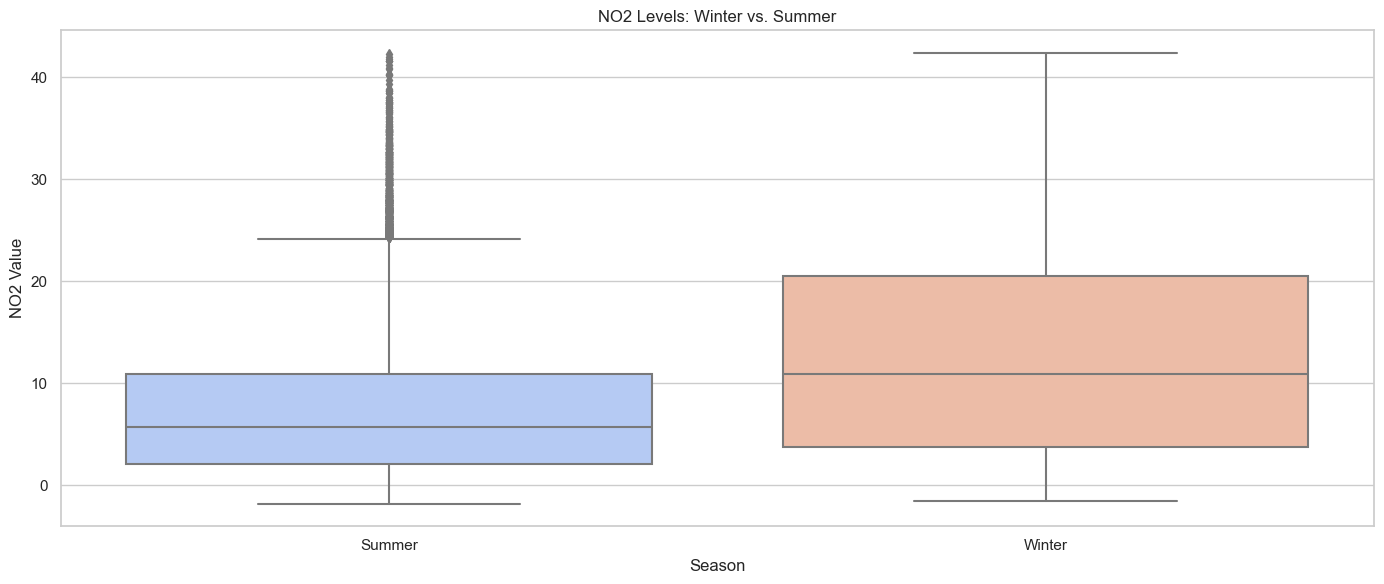

In [99]:
# Data Visualization : Plot NO2 Levels for Winter vs. Summer:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Filter data for Winter and Summer
seasonal_data = data_cleaned[data_cleaned['Season'].isin(['Winter', 'Summer'])]

# Plot the data
plt.figure(figsize=(14, 6))
sns.boxplot(data=seasonal_data, x='Season', y='Value', palette='coolwarm')
plt.title('NO2 Levels: Winter vs. Summer')
plt.xlabel('Season')
plt.ylabel('NO2 Value')
plt.tight_layout()
plt.show()

In [100]:
# Calculate mean NO2 values for winter and summer
mean_values = data_cleaned.groupby('Season')['Value'].mean()
print("Average NO2 Levels:")
print(f"Winter: {mean_values['Winter']:.2f}")
print(f"Summer: {mean_values['Summer']:.2f}")

Average NO2 Levels:
Winter: 13.36
Summer: 7.34


In [101]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

In [103]:
print(data_cleaned.shape)

(151364, 11)


In [111]:
# Select only the 'Timestamp' and 'Value' columns
data_selected = data_cleaned[['Timestamp', 'Value']]
print(data_selected.shape)
print(data_selected.dtypes)
print (data_selected.head())

(151364, 2)
Timestamp    datetime64[ns, UTC+12:00]
Value                          float64
dtype: object
                  Timestamp  Value
0 2006-01-01 00:00:00+12:00    1.2
1 2006-01-01 01:00:00+12:00    0.8
2 2006-01-01 02:00:00+12:00    0.5
3 2006-01-01 03:00:00+12:00    0.4
4 2006-01-01 04:00:00+12:00    0.4


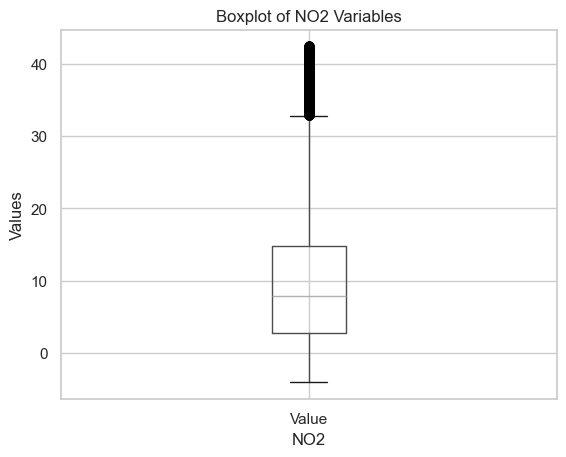

In [108]:
data_selected.boxplot()

# Set title and labels
plt.title('Boxplot of NO2 Variables')
plt.xlabel('NO2')
plt.ylabel('Values')

# Show the plot
plt.show()

In [117]:
# Convert 'Timestamp' to datetime
data_selected['Timestamp'] = pd.to_datetime(data_selected['Timestamp'])

# Format the 'Timestamp' to 'Date' format
data_selected['Date'] = data_selected['Timestamp'].dt.strftime('%-d/%m/%Y %H:%M')

# Display the result
print(data_selected[['Date']])

                             Date
0       2006-01-01 00:00:00+12:00
1       2006-01-01 01:00:00+12:00
2       2006-01-01 02:00:00+12:00
3       2006-01-01 03:00:00+12:00
4       2006-01-01 04:00:00+12:00
...                           ...
151359  2024-11-06 20:00:00+12:00
151360  2024-11-06 21:00:00+12:00
151361  2024-11-06 22:00:00+12:00
151362  2024-11-06 23:00:00+12:00
151363  2024-11-07 00:00:00+12:00

[151364 rows x 1 columns]


In [117]:
# Convert 'Timestamp' to datetime
data_selected['Timestamp'] = pd.to_datetime(data_selected['Timestamp'])

# Format the 'Timestamp' to 'Date' format
data_selected['Date'] = data_selected['Timestamp'].dt.strftime('%-d/%m/%Y %H:%M')

# Display the result
print(data_selected[['Date']])

                             Date
0       2006-01-01 00:00:00+12:00
1       2006-01-01 01:00:00+12:00
2       2006-01-01 02:00:00+12:00
3       2006-01-01 03:00:00+12:00
4       2006-01-01 04:00:00+12:00
...                           ...
151359  2024-11-06 20:00:00+12:00
151360  2024-11-06 21:00:00+12:00
151361  2024-11-06 22:00:00+12:00
151362  2024-11-06 23:00:00+12:00
151363  2024-11-07 00:00:00+12:00

[151364 rows x 1 columns]


In [127]:
# Extract date and time components
data_selected['Hour'] = data_selected['Timestamp'].dt.hour
data_selected['Date'] = data_selected['Timestamp'].dt.date 
#data_selected['DateHour'] = data_selected['Timestamp'].dt.strftime('%d/%m/%Y %H:%M') 


# Display the transformed DataFrame
print(data_selected.head())

                  Timestamp  Value        Date  Hour
0 2006-01-01 00:00:00+12:00    1.2  2006-01-01     0
1 2006-01-01 01:00:00+12:00    0.8  2006-01-01     1
2 2006-01-01 02:00:00+12:00    0.5  2006-01-01     2
3 2006-01-01 03:00:00+12:00    0.4  2006-01-01     3
4 2006-01-01 04:00:00+12:00    0.4  2006-01-01     4


In [144]:
# Extract date and time components
data_selected['Hour'] = data_selected['Timestamp'].dt.hour
data_selected['Date'] = data_selected['Timestamp'].dt.date 
data_selected['DateHour'] = data_selected['Timestamp'].dt.strftime('%d/%m/%Y %H:%M') 


# Display the transformed DataFrame
print(data_selected.head())

                  Timestamp  Value        Date  Hour          DateHour
0 2006-01-01 00:00:00+12:00    1.2  2006-01-01     0  01/01/2006 00:00
1 2006-01-01 01:00:00+12:00    0.8  2006-01-01     1  01/01/2006 01:00
2 2006-01-01 02:00:00+12:00    0.5  2006-01-01     2  01/01/2006 02:00
3 2006-01-01 03:00:00+12:00    0.4  2006-01-01     3  01/01/2006 03:00
4 2006-01-01 04:00:00+12:00    0.4  2006-01-01     4  01/01/2006 04:00


In [145]:
# Perform Arima
# Select only the 'DateHour' and 'Value' columns
data_arima = data_selected[['DateHour', 'Value']]
print(data_arima.shape)
print(data_arima.dtypes)
print (data_arima.head())

(151364, 2)
DateHour     object
Value       float64
dtype: object
           DateHour  Value
0  01/01/2006 00:00    1.2
1  01/01/2006 01:00    0.8
2  01/01/2006 02:00    0.5
3  01/01/2006 03:00    0.4
4  01/01/2006 04:00    0.4


In [146]:
print (data_arima.head(50))


            DateHour      Value
0   01/01/2006 00:00   1.200000
1   01/01/2006 01:00   0.800000
2   01/01/2006 02:00   0.500000
3   01/01/2006 03:00   0.400000
4   01/01/2006 04:00   0.400000
5   01/01/2006 05:00   0.600000
6   01/01/2006 06:00   0.400000
7   01/01/2006 07:00   0.500000
8   01/01/2006 08:00   0.500000
9   01/01/2006 09:00   1.200000
10  01/01/2006 10:00   1.100000
11  01/01/2006 11:00   1.100000
12  01/01/2006 12:00   1.200000
13  01/01/2006 13:00   1.600000
14  01/01/2006 14:00   0.900000
15  01/01/2006 15:00   1.100000
16  01/01/2006 16:00   1.000000
17  01/01/2006 17:00   1.300000
18  01/01/2006 18:00   1.300000
19  01/01/2006 19:00   1.400000
20  01/01/2006 20:00   1.500000
21  01/01/2006 21:00   2.100000
22  01/01/2006 22:00   4.300000
23  01/01/2006 23:00   1.400000
24  02/01/2006 00:00   1.500000
25  02/01/2006 01:00   1.600000
26  02/01/2006 02:00   0.900000
27  02/01/2006 03:00  10.964901
28  02/01/2006 04:00   0.300000
29  02/01/2006 05:00   0.500000
30  02/0

In [148]:
print (data_arima.tail(150))


                DateHour  Value
151214  31/10/2024 19:00    2.5
151215  31/10/2024 20:00    5.6
151216  31/10/2024 21:00    8.9
151217  31/10/2024 22:00   10.3
151218  31/10/2024 23:00    8.5
...                  ...    ...
151359  06/11/2024 20:00    8.9
151360  06/11/2024 21:00    9.2
151361  06/11/2024 22:00    9.6
151362  06/11/2024 23:00    9.2
151363  07/11/2024 00:00    7.6

[150 rows x 2 columns]


In [171]:
print (data_arima.tail(10))


                               DateHour  Value
2042-02-06 05:00:00 2024-11-06 15:00:00    3.4
2042-02-06 06:00:00 2024-11-06 16:00:00   -0.0
2042-02-06 07:00:00 2024-11-06 17:00:00   -0.1
2042-02-06 08:00:00 2024-11-06 18:00:00    0.8
2042-02-06 09:00:00 2024-11-06 19:00:00    5.3
2042-02-06 10:00:00 2024-11-06 20:00:00    8.9
2042-02-06 11:00:00 2024-11-06 21:00:00    9.2
2042-02-06 12:00:00 2024-11-06 22:00:00    9.6
2042-02-06 13:00:00 2024-11-06 23:00:00    9.2
2042-02-06 14:00:00 2024-11-07 00:00:00    7.6


In [149]:
# Save the the data_arima into a new csv file so it's easy to recall later on 
data_arima.to_csv(r'C:\Users\wendy\anaconda3\CapstoneProject\No2_data_arima.csv', index=False)

In [4]:
#Recall/read dataset data_arima when running out of memory
# Load the CSV file
data_arima = pd.read_csv('No2_data_arima.csv')

# Display the first few rows
print(data_arima.head())
print (data_arima.tail(50))


           DateHour  Value
0  01/01/2006 00:00    1.2
1  01/01/2006 01:00    0.8
2  01/01/2006 02:00    0.5
3  01/01/2006 03:00    0.4
4  01/01/2006 04:00    0.4
                DateHour      Value
151314  04/11/2024 23:00  12.800000
151315  05/11/2024 00:00   7.400000
151316  05/11/2024 01:00   6.400000
151317  05/11/2024 02:00   6.300000
151318  05/11/2024 03:00   6.100000
151319  05/11/2024 04:00   8.400000
151320  05/11/2024 05:00  15.700000
151321  05/11/2024 06:00  17.200000
151322  05/11/2024 07:00  19.400000
151323  05/11/2024 08:00  16.600000
151324  05/11/2024 09:00   2.000000
151325  05/11/2024 10:00   1.500000
151326  05/11/2024 11:00   1.400000
151327  05/11/2024 12:00   0.700000
151328  05/11/2024 13:00   1.600000
151329  05/11/2024 14:00   1.700000
151330  05/11/2024 15:00   1.700000
151331  05/11/2024 16:00   1.300000
151332  05/11/2024 17:00   1.300000
151333  05/11/2024 18:00   1.400000
151334  05/11/2024 19:00   1.900000
151335  05/11/2024 20:00   3.000000
151336  05

In [5]:
# Convert the "DateHour" column to datetime format
data_arima['DateHour'] = pd.to_datetime(data_arima['DateHour'], dayfirst = True)

# Sort the DataFrame by the "Date" column to ensure that the timestamps are in ascending order.
data_arima = data_arima.sort_values(by='DateHour')

# Calculate the time differences between consecutive timestamps
time_diffs = data_arima['DateHour'].diff()

# Print the time interval
print("Time interval:", time_diffs.min())

Time interval: 0 days 01:00:00


In [6]:
# Calculate the moving average of NO2 Value
window_size = 30  # Adjust the window size as needed
data_arima['Moving_Avg_Value'] = data_arima['Value'].rolling(window=window_size).mean()

# Plot the original price and the moving average
plt.figure(figsize=(12, 6))
plt.plot(data_arima['DateHour'], data_arima['Value'], label='Original Value')
plt.plot(data_arima['DateHour'], data_arima['Moving_Avg_Value, label=f'{window_size}-Day Moving Average', color='red')
plt.title('Trend Analysis: Original Value vs Moving Average')
plt.xlabel('DateHour')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

SyntaxError: unterminated string literal (detected at line 8) (3361263103.py, line 8)

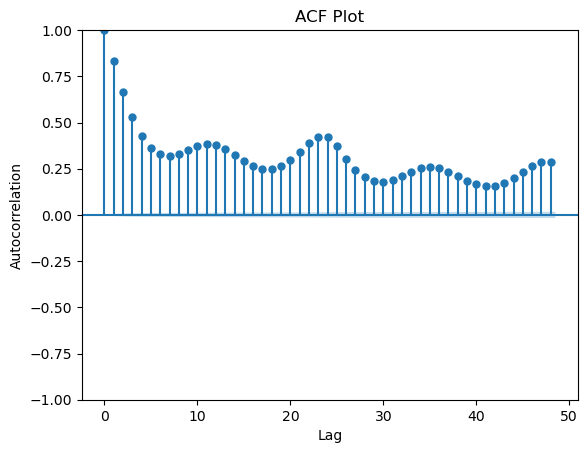

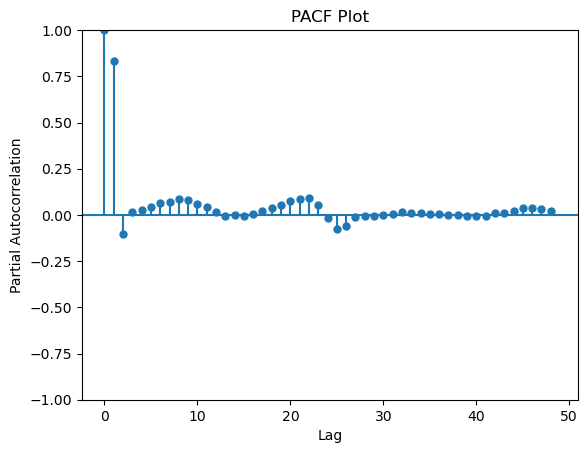

In [7]:
# Plot ACF
plot_acf(data_arima['Value'], lags=48)  # Change lags value according to your data
plt.title('ACF Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plot_pacf(data_arima['Value'], lags=48)  # Change lags value according to your data
plt.title('PACF Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

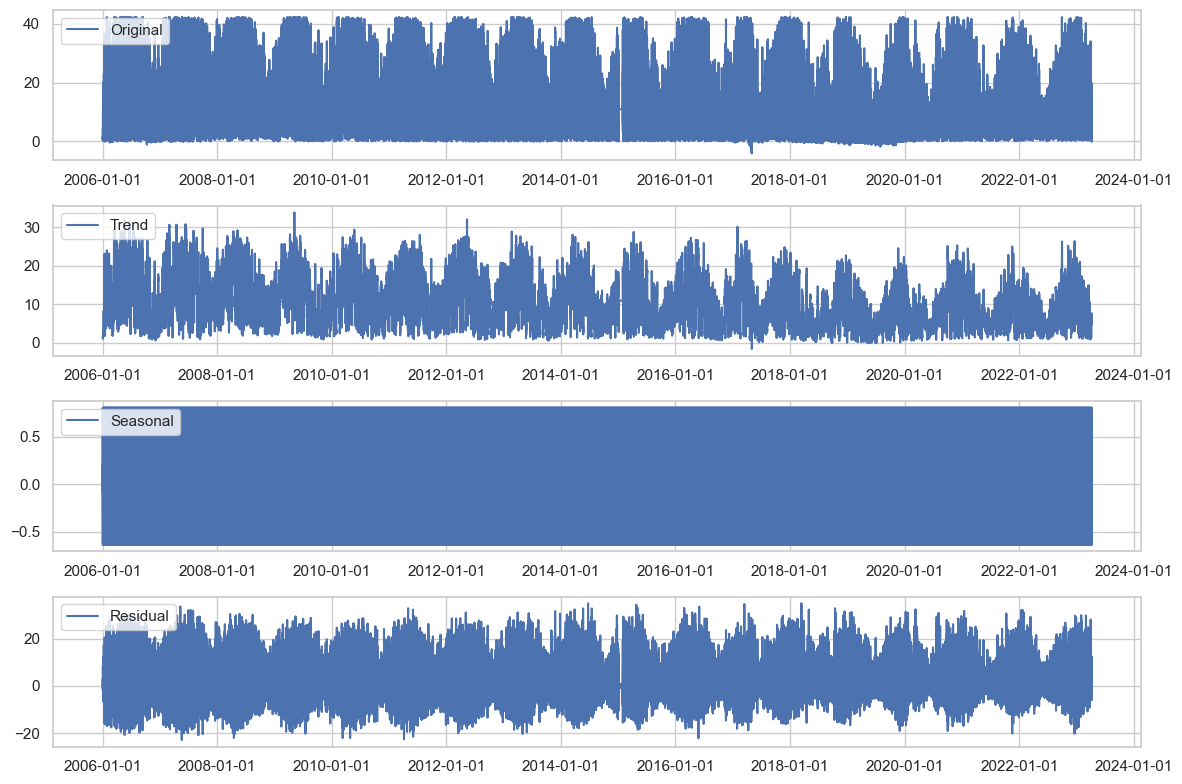

In [162]:
# Convert index to DatetimeIndex if not already done
data_arima.index = pd.to_datetime(data_arima.index)

# Set the start date explicitly if needed
start_date = '2006-01-01 00:00'
data_arima.index = pd.date_range(start=start_date, periods=len(data_arima), freq='H')  # Assuming hourly frequency

# Perform seasonal decomposition
result = seasonal_decompose(data_arima['Value'], model='additive', period=24)  # Set period to 24 hours in a day 

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data_arima.index, data_arima['Value'], label='Original')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.subplot(412)
plt.plot(data_arima.index, result.trend, label='Trend')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.subplot(413)
plt.plot(data_arima.index, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.subplot(414)
plt.plot(data_arima.index, result.resid, label='Residual')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.tight_layout()
plt.show()


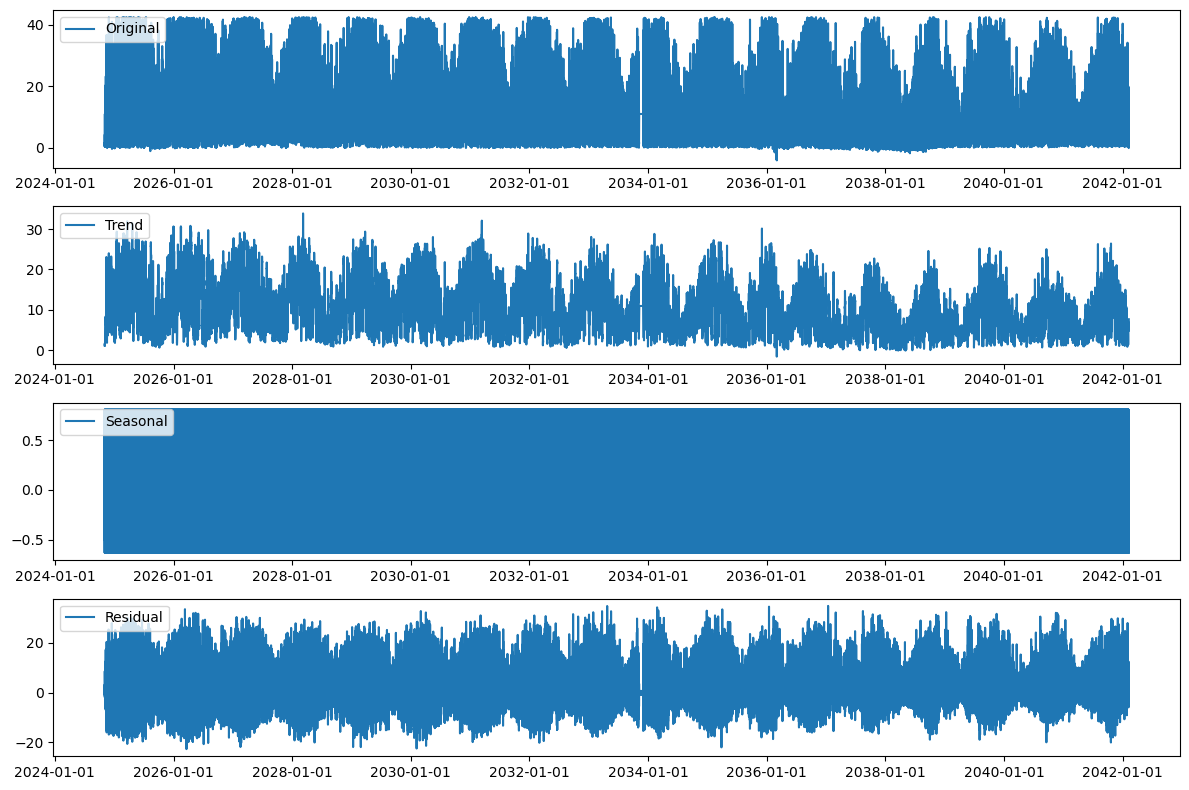

In [9]:
# Convert index to DatetimeIndex if not already done
data_arima.index = pd.to_datetime(data_arima.index)

# Set the start date explicitly if needed
start_date = '2024-11-02 16:00:00'
data_arima.index = pd.date_range(start=start_date, periods=len(data_arima), freq='H')  # Assuming hourly frequency

# Perform seasonal decomposition
result = seasonal_decompose(data_arima['Value'], model='additive', period=24)  # Set period to 24 hours in a day 

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data_arima.index, data_arima['Value'], label='Original')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.subplot(412)
plt.plot(data_arima.index, result.trend, label='Trend')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.subplot(413)
plt.plot(data_arima.index, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.subplot(414)
plt.plot(data_arima.index, result.resid, label='Residual')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

# Load the data
data_arima = pd.read_csv('No2_data_arima.csv', parse_dates=['DateHour'], index_col='DateHour', dayfirst=True)
# Convert index to DatetimeIndex if not already done
data_arima.index = pd.to_datetime(data_arima.index)

# Set the start date explicitly if needed
# Assuming the data is already correctly indexed, this step might not be necessary
# start_date = '2024-11-02 16:00:00'
# data_arima.index = pd.date_range(start=start_date, periods=len(data_arima), freq='H')  # Assuming hourly frequency

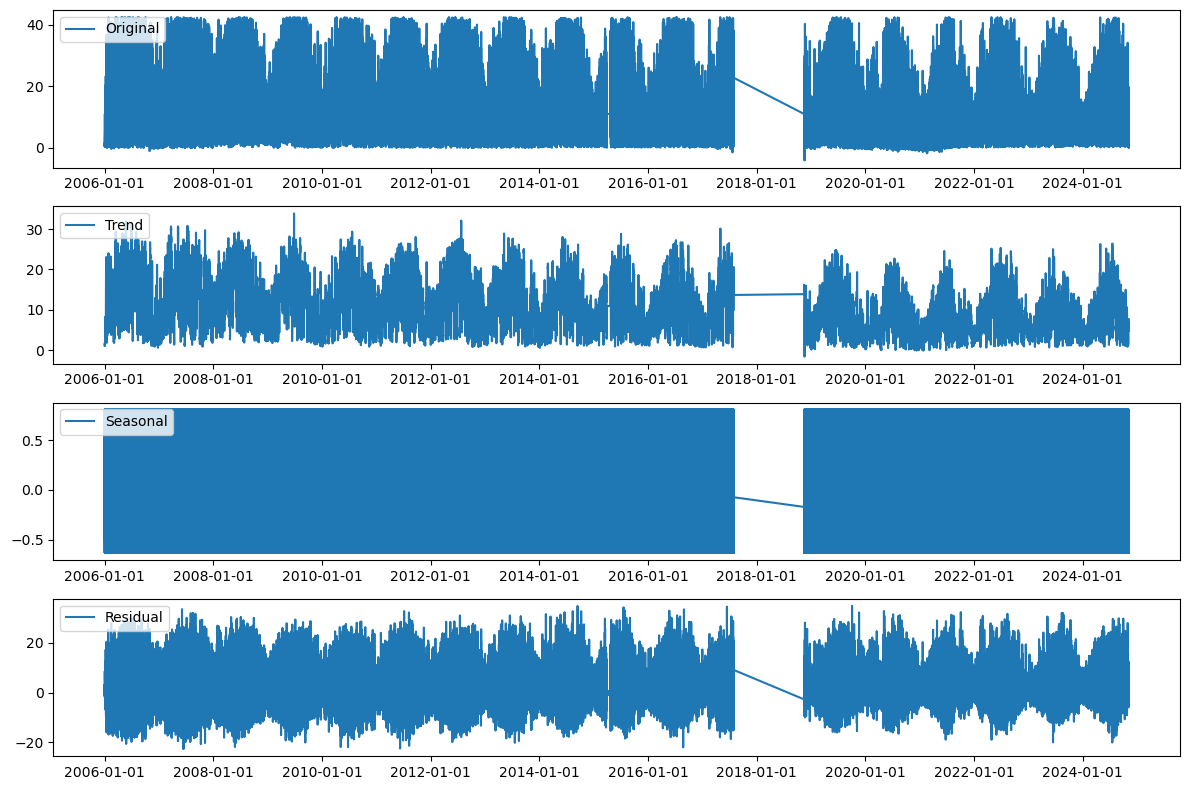

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
result = seasonal_decompose(data_arima['Value'], model='additive', period=24)  # Assuming hourly data with daily seasonality

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data_arima.index, data_arima['Value'], label='Original')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.subplot(412)
plt.plot(data_arima.index, result.trend, label='Trend')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.subplot(413)
plt.plot(data_arima.index, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.subplot(414)
plt.plot(data_arima.index, result.resid, label='Residual')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

plt.tight_layout()
plt.show()

In [ ]:
#Filtering the data_arima to extract Oct-Nov 2024 NO2 values 

In [5]:
# Recall/read Dataset data_arima 
# load the CSV file
data_arima = pd.read_csv('No2_data_arima.csv')

# Display the first few rows
print(data_arima.head())
print(data_arima.tail(50))

           DateHour  Value
0  01/01/2006 00:00    1.2
1  01/01/2006 01:00    0.8
2  01/01/2006 02:00    0.5
3  01/01/2006 03:00    0.4
4  01/01/2006 04:00    0.4
                DateHour      Value
151314  04/11/2024 23:00  12.800000
151315  05/11/2024 00:00   7.400000
151316  05/11/2024 01:00   6.400000
151317  05/11/2024 02:00   6.300000
151318  05/11/2024 03:00   6.100000
151319  05/11/2024 04:00   8.400000
151320  05/11/2024 05:00  15.700000
151321  05/11/2024 06:00  17.200000
151322  05/11/2024 07:00  19.400000
151323  05/11/2024 08:00  16.600000
151324  05/11/2024 09:00   2.000000
151325  05/11/2024 10:00   1.500000
151326  05/11/2024 11:00   1.400000
151327  05/11/2024 12:00   0.700000
151328  05/11/2024 13:00   1.600000
151329  05/11/2024 14:00   1.700000
151330  05/11/2024 15:00   1.700000
151331  05/11/2024 16:00   1.300000
151332  05/11/2024 17:00   1.300000
151333  05/11/2024 18:00   1.400000
151334  05/11/2024 19:00   1.900000
151335  05/11/2024 20:00   3.000000
151336  05

In [6]:
data_arima.dtypes

DateHour     object
Value       float64
dtype: object

In [9]:
# Convert index to DatatimeIndex if not already done
data_arima.index = pd.to_datetime(data_arima.index)

In [11]:
# Convert DateHour column to datetime format
data_arima['DateHour'] = pd.to_datetime(data_arima['DateHour'], dayfirst = True)

In [12]:
data_arima.dtypes

DateHour    datetime64[ns]
Value              float64
dtype: object

In [26]:
# Filter the data for October and November 2024
filtered_data = data_arima[(data_arima['DateHour'].dt.year == 2024) & (data_arima['DateHour'].dt.month.isin([10, 11]))]

# Display the filtered data
print(filtered_data)

                                         DateHour      Value
1970-01-01 00:00:00.000150475 2024-10-01 00:00:00  13.100000
1970-01-01 00:00:00.000150476 2024-10-01 01:00:00  10.964901
1970-01-01 00:00:00.000150477 2024-10-01 02:00:00   9.400000
1970-01-01 00:00:00.000150478 2024-10-01 03:00:00   8.500000
1970-01-01 00:00:00.000150479 2024-10-01 04:00:00   7.000000
...                                           ...        ...
1970-01-01 00:00:00.000151359 2024-11-06 20:00:00   8.900000
1970-01-01 00:00:00.000151360 2024-11-06 21:00:00   9.200000
1970-01-01 00:00:00.000151361 2024-11-06 22:00:00   9.600000
1970-01-01 00:00:00.000151362 2024-11-06 23:00:00   9.200000
1970-01-01 00:00:00.000151363 2024-11-07 00:00:00   7.600000

[889 rows x 2 columns]


In [27]:
filtered_data.dtypes

DateHour    datetime64[ns]
Value              float64
dtype: object

In [22]:
# Save the the filtered_data into a new csv file so it's easy to recall later on 
filtered_data.to_csv(r'C:\Users\wendy\anaconda3\CapstoneProject\No2_filtered_data.csv', index=False)

In [25]:
data = pd.read_csv('No2_filtered_data.csv')
print(data.columns)

Index(['Value'], dtype='object')


In [30]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
#filtered_data = pd.read_csv('No2_filtered_data.csv', parse_dates=['DateHour'], index_col='DateHour', dayfirst=True)
# Load the data
filtered_data = pd.read_csv('No2_filtered_data.csv')

# Create a datetime index manually (assuming hourly data starting from a specific date)
start_date = "2024-10-01 00:00:00"  # Adjust the start date as needed
filtered_data['DateHour'] = pd.date_range(start=start_date, periods=len(filtered_data), freq='H')
filtered_data.set_index('DateHour', inplace=True)


In [31]:
# Ensure the index is a DatetimeIndex
#filtered_data.index = pd.to_datetime(filtered_data.index)

# Handle missing values (if any)
filtered_data['Value'] = filtered_data['Value'].interpolate()

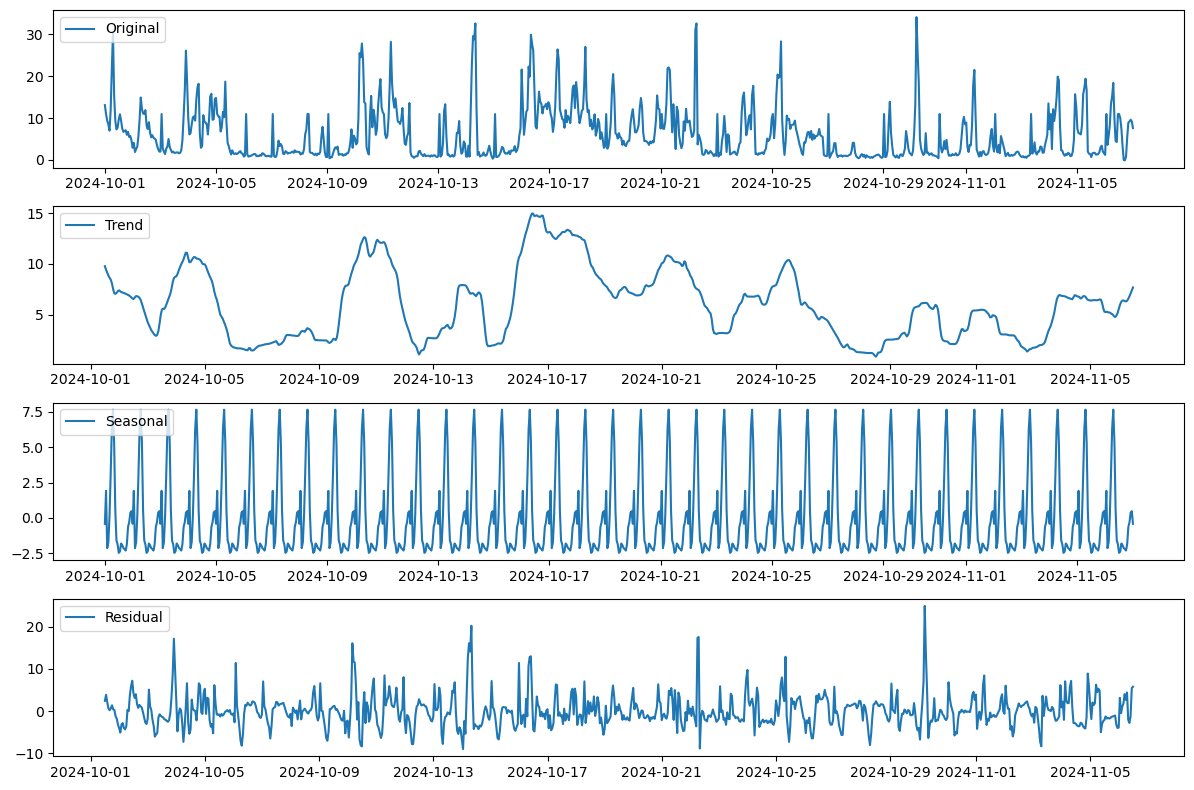

In [32]:
# Perform seasonal decomposition
result = seasonal_decompose(filtered_data['Value'], model='additive', period=24)  # Assuming hourly data with daily seasonality

# Plot the decomposition
plt.figure(figsize=(12, 8))

# Original data
plt.subplot(411)
plt.plot(filtered_data.index, filtered_data['Value'], label='Original')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

# Trend component
plt.subplot(412)
plt.plot(filtered_data.index, result.trend, label='Trend')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

# Seasonal component
plt.subplot(413)
plt.plot(filtered_data.index, result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

# Residual component
plt.subplot(414)
plt.plot(filtered_data.index, result.resid, label='Residual')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-axis as "YYYY-MM-DD"

# Adjust layout
plt.tight_layout()
plt.show()

In [36]:
from pmdarima import auto_arima

# Fit ARIMA model
model = auto_arima(filtered_data['Value'], seasonal=True, m=24, trace=True, error_action='ignore', suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=11.30 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=5019.140, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=4999.808, Time=1.25 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=5006.329, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=5017.142, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=5021.137, Time=0.27 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=4971.828, Time=5.88 sec
 ARIMA(1,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=47.63 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=9.33 sec
 ARIMA(0,1,0)(2,0,0)[24] intercept   : AIC=4970.929, Time=3.95 sec
 ARIMA(0,1,0)(1,0,0)[24] intercept   : AIC=4998.890, Time=0.79 sec
 ARIMA(0,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=29.90 sec
 ARIMA(0,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=5.59 sec
 ARIMA(0,1,1)(2,0,0)[24] intercept   : AIC=4971.285, Time=6.90 sec
 ARIMA(1,1,1)(2,0,0)[24] intercept   : AI

2024-11-07 01:00:00     8.709923
2024-11-07 02:00:00     7.714902
2024-11-07 03:00:00     7.956380
2024-11-07 04:00:00     8.726251
2024-11-07 05:00:00    10.751796
2024-11-07 06:00:00    11.267722
2024-11-07 07:00:00    12.098665
2024-11-07 08:00:00    10.440815
2024-11-07 09:00:00     7.039431
2024-11-07 10:00:00     6.920494
2024-11-07 11:00:00     7.785731
2024-11-07 12:00:00     7.656345
2024-11-07 13:00:00     7.694760
2024-11-07 14:00:00     7.381760
2024-11-07 15:00:00     6.838127
2024-11-07 16:00:00     6.313375
2024-11-07 17:00:00     6.300115
2024-11-07 18:00:00     6.437933
2024-11-07 19:00:00     7.127022
2024-11-07 20:00:00     7.807680
2024-11-07 21:00:00     7.921394
2024-11-07 22:00:00     7.715658
2024-11-07 23:00:00     7.588685
2024-11-08 00:00:00     7.302600
Freq: H, dtype: float64


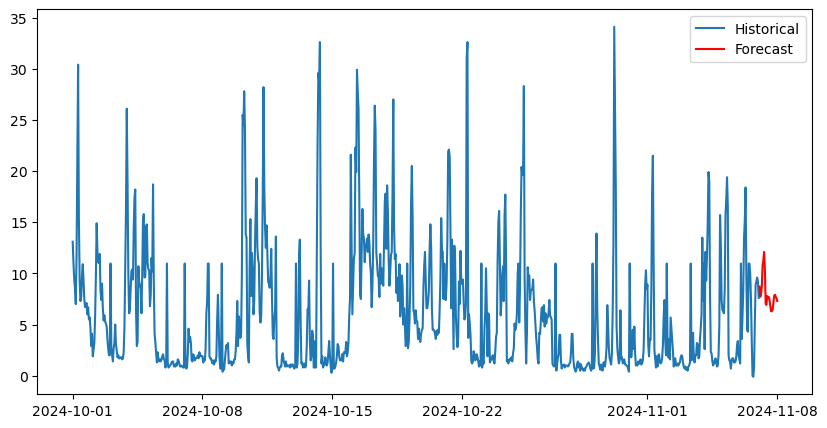

In [38]:
# Forecast the next 24 hours
forecast = model.predict(n_periods=24)
print(forecast)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(filtered_data.index, filtered_data['Value'], label='Historical')
plt.plot(pd.date_range(filtered_data.index[-1], periods=25, freq='H')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.show()

In [ ]:
pip install streamlit_jupyter
